In [ ]:
tourist_locations = [
    "Ajmer",
    "Alwar",
    "Barmer",
    "Banswara",
    "Bharatpur",
    "Bikaner",
    "Bundi",
    "Chittorgarh",
    "Churu",
    "Dungarpur",
    "Jaipur",
    "Jaisalmer",
    "Jodhpur",
    "Kota",
    "Mount Abu",
    "Pushkar",
    "Ranthambore",
    "Sawai Madhopur",
    "Sikar",
    "Udaipur",
    "Ajmer Sharif Dargah",
    "Keoladeo National Park",
    "Rani Sati Dadi Mandir",
    "Jhalawar",
    "Neemrana",
    "Sambhar Lake",
    "Mandawa",
    "Nathdwara",
    "Osian",
    "Kumbhalgarh",
    "Chittor Fort",
    "Bagru",
    "Birla Mandir",
]



In [ ]:
from math import radians, sin, cos, sqrt, atan2

def distance_between_locations(location1, location2):
    # Coordinates of locations in Rajasthan (latitude, longitude)
    coordinates = {
       "Ajmer": (26.4499, 74.6399),
    "Alwar": (27.5645, 76.6250),
    "Barmer": (25.7500, 71.4167),
    "Banswara": (23.5464, 74.4349),
    "Bharatpur": (27.1767, 77.6845),
    "Bikaner": (28.0229, 73.3119),
    "Bundi": (25.4415, 75.6454),
    "Chittorgarh": (24.8799, 74.6299),
    "Churu": (28.3052, 74.9675),
    "Dungarpur": (23.8415, 73.7146),
    "Jaipur": (26.9124, 75.7873),
    "Jaisalmer": (26.9157, 70.9083),
    "Jodhpur": (26.2389, 73.0243),
    "Kota": (25.2138, 73.8648),
    "Mount Abu": (24.5925, 72.7156),
    "Pushkar": (26.4909, 74.5527),
    "Ranthambore": (25.0170, 76.5026),
    "Sawai Madhopur": (25.9945, 76.5303),
    "Sikar": (27.6094, 75.1398),
    "Udaipur": (24.5854, 73.7125),
    "Ajmer Sharif Dargah": (26.4662, 74.6302),
    "Keoladeo National Park": (27.1574, 77.4234),
    "Rani Sati Dadi Mandir": (27.1672, 75.6493),
    "Jhalawar": (23.5916, 76.1660),
    "Neemrana": (27.0202, 76.4578),
    "Sambhar Lake": (26.0151, 75.0360),
    "Mandawa": (27.1395, 75.1484),
    "Nathdwara": (24.5921, 73.6816),
    "Osian": (26.3056, 72.7927),
    "Kumbhalgarh": (25.1442, 73.4939),
    "Chittor Fort": (24.8799, 74.6299),
    "Bagru": (26.8512, 75.5687),
    "Birla Mandir": (26.8892, 75.8259)
    }

    lat1, lon1 = (coordinates[location1][0]), (coordinates[location1][1])
    lat2, lon2 = (coordinates[location2][0]), (coordinates[location2][1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    distance = (dlon**2 + dlat**2)**0.5

    return distance

In [ ]:
def total_distance(tour):
    total = 0
    for i in range(len(tour) - 1):
        total += distance_between_locations(tour[i], tour[i + 1])
    # Add distance from last location back to the starting location to complete the tour
    total += distance_between_locations(tour[-1], tour[0])
    return total

In [ ]:
import random
import math

def simulated_annealing(tourist_locations, iterations, initial_temperature, cooling_rate):
    current_solution = tourist_locations[:]
    best_solution = tourist_locations[:]
    current_temperature = initial_temperature

    for i in range(iterations):
        new_solution = current_solution[:]

        # Perform a random swap to get a new solution
        swap_index1 = random.randint(0, len(new_solution) - 1)
        swap_index2 = random.randint(0, len(new_solution) - 1)
        new_solution[swap_index1], new_solution[swap_index2] = new_solution[swap_index2], new_solution[swap_index1]

        # Calculate the cost (total distance) of the new solution
        current_cost = total_distance(current_solution)
        new_cost = total_distance(new_solution)

        # If the new solution is better or the acceptance probability is met, accept it
        if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / current_temperature):
            current_solution = new_solution[:]

        # Update the best solution found so far
        if total_distance(current_solution) < total_distance(best_solution):
            best_solution = current_solution[:]

        # Cool down the temperature
        current_temperature *= 1 - cooling_rate

    return best_solution

# Parameters for simulated annealing
iterations = 5000
initial_temperature = 1000.0
cooling_rate = 0.003

# Find the best tour using simulated annealing
best_tour = simulated_annealing(tourist_locations, iterations, initial_temperature, cooling_rate)
print("Best tour:", best_tour)
print("Total distance:", total_distance(best_tour))

Best tour: ['Jaisalmer', 'Barmer', 'Osian', 'Jodhpur', 'Kumbhalgarh', 'Pushkar', 'Ajmer Sharif Dargah', 'Ajmer', 'Bagru', 'Jaipur', 'Birla Mandir', 'Neemrana', 'Keoladeo National Park', 'Bharatpur', 'Alwar', 'Rani Sati Dadi Mandir', 'Sikar', 'Mandawa', 'Sambhar Lake', 'Jhalawar', 'Banswara', 'Dungarpur', 'Mount Abu', 'Nathdwara', 'Udaipur', 'Kota', 'Chittorgarh', 'Chittor Fort', 'Bundi', 'Ranthambore', 'Sawai Madhopur', 'Churu', 'Bikaner']
Total distance: 32.74707177707829


Best tour: [11, 4, 12, 17, 24, 25, 26, 27, 18, 16, 15, 14, 13, 6, 7, 8, 21, 20, 33, 32, 31, 30, 19, 28, 29, 46, 47, 48, 49, 50, 55, 54, 53, 45, 44, 52, 73, 88, 92, 97, 99, 100, 101, 105, 104, 111, 122, 129, 120, 117, 113, 123, 124, 125, 126, 130, 128, 121, 119, 115, 127, 118, 114, 112, 106, 107, 98, 86, 87, 91, 93, 108, 109, 116, 110, 102, 103, 96, 95, 94, 90, 89, 85, 84, 83, 82, 79, 78, 81, 80, 77, 76, 74, 67, 63, 61, 64, 68, 69, 75, 70, 66, 62, 65, 56, 51, 34, 35, 36, 37, 38, 57, 71, 72, 58, 59, 60, 43, 42, 23, 41, 40, 39, 22, 9, 10, 3, 2, 1, 0, 5]
Total distance (km): 656.2754786750126


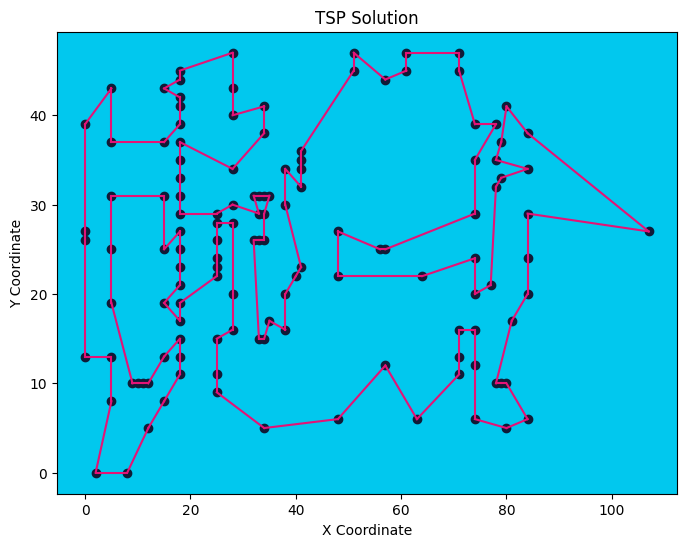

In [ ]:
import random
import math
import matplotlib.pyplot as plt

# Function to parse TSPLIB file
def parse_tsplib(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        node_coords_section = False
        node_coords = []
        for line in lines:
            if line.startswith('NODE_COORD_SECTION'):
                node_coords_section = True
                continue
            if line.startswith('EOF'):
                break
            if node_coords_section:
                node_data = line.strip().split()
                node_coords.append((float(node_data[1]), float(node_data[2])))
        return node_coords

# Function to calculate Euclidean distance between two nodes
def distance(node1, node2):
    return math.sqrt((node1[0] - node2[0]) ** 2 + (node1[1] - node2[1]) ** 2)

# Function to calculate total distance of a tour
def total_distance(tour, nodes):
    total = 0
    for i in range(len(tour) - 1):
        total += distance(nodes[tour[i]], nodes[tour[i + 1]])
    # Add distance from last node back to the starting node to complete the tour
    total += distance(nodes[tour[-1]], nodes[tour[0]])
    return total

# Simulated annealing function
def simulated_annealing(nodes, iterations, initial_temperature, cooling_rate):
    n = len(nodes)
    current_tour = list(range(n))
    random.shuffle(current_tour)  # Shuffle the initial tour
    best_tour = current_tour[:]
    current_temperature = initial_temperature

    for i in range(iterations):
        # Calculate the cost (total distance) of the current tour
        current_cost = total_distance(current_tour, nodes)

        # Generate a neighboring solution by reversing a random segment of the current tour
        new_tour = current_tour[:]
        start_index = random.randint(0, n - 1)
        end_index = random.randint(start_index + 1, n)
        new_tour[start_index:end_index] = reversed(new_tour[start_index:end_index])
        new_cost = total_distance(new_tour, nodes)

        # If the new solution is better or the acceptance probability is met, accept it
        if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / current_temperature):
            current_tour = new_tour[:]

        # Update the best solution found so far
        if total_distance(current_tour, nodes) < total_distance(best_tour, nodes):
            best_tour = current_tour[:]

        # Cool down the temperature
        current_temperature *= 1 - cooling_rate

    return best_tour

# Load data from TSPLIB file
filename = "xqf131.tsp"
nodes = parse_tsplib(filename)

# Parameters for simulated annealing
iterations = 100000
initial_temperature = 1000.0
cooling_rate = 0.0003

# Find the best tour using simulated annealing
best_tour = simulated_annealing(nodes, iterations, initial_temperature, cooling_rate)
print("Best tour:", best_tour)
print("Total distance (km):", total_distance(best_tour, nodes))

# Function to plot the data points and edges
def plot_tour(nodes, tour):
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))

    # Set the background color
    plt.gca().set_facecolor('#01C8EE')  # Background color

    plt.scatter(x, y, color='#101B37')  # Node color
    plt.title('TSP Solution')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')

    # Plot edges representing the tour
    for i in range(len(tour) - 1):
        plt.plot([nodes[tour[i]][0], nodes[tour[i + 1]][0]],
                 [nodes[tour[i]][1], nodes[tour[i + 1]][1]], color='#E41376')  # Edge color
    plt.plot([nodes[tour[-1]][0], nodes[tour[0]][0]],
             [nodes[tour[-1]][1], nodes[tour[0]][1]], color='#E41376')  # Connect last node to first node

    plt.show()

# Plot the tour
plot_tour(nodes, best_tour)


Best tour: [202, 224, 173, 172, 214, 208, 216, 235, 239, 229, 241, 253, 250, 276, 270, 267, 268, 266, 255, 256, 257, 269, 245, 244, 243, 226, 227, 220, 228, 221, 179, 181, 149, 162, 161, 160, 168, 159, 158, 157, 154, 152, 148, 141, 118, 116, 115, 105, 90, 85, 73, 63, 74, 64, 53, 41, 40, 16, 1, 3, 2, 4, 42, 17, 19, 21, 22, 5, 6, 7, 23, 24, 20, 18, 43, 55, 54, 75, 65, 91, 109, 110, 108, 107, 117, 143, 145, 144, 146, 174, 163, 167, 153, 147, 142, 138, 137, 114, 112, 113, 129, 76, 38, 14, 0, 15, 39, 52, 61, 71, 62, 72, 84, 88, 103, 104, 89, 106, 119, 120, 121, 122, 123, 125, 124, 126, 128, 150, 127, 92, 86, 98, 99, 93, 77, 51, 25, 8, 26, 27, 28, 9, 44, 66, 79, 78, 29, 31, 30, 10, 11, 32, 33, 35, 34, 45, 57, 68, 36, 37, 12, 46, 47, 13, 48, 58, 69, 59, 50, 49, 60, 97, 70, 96, 136, 139, 140, 166, 151, 156, 155, 135, 95, 87, 83, 82, 81, 67, 56, 80, 111, 100, 94, 101, 102, 131, 130, 132, 133, 134, 165, 170, 164, 169, 193, 194, 196, 210, 195, 209, 211, 198, 212, 251, 254, 252, 240, 215, 213, 171

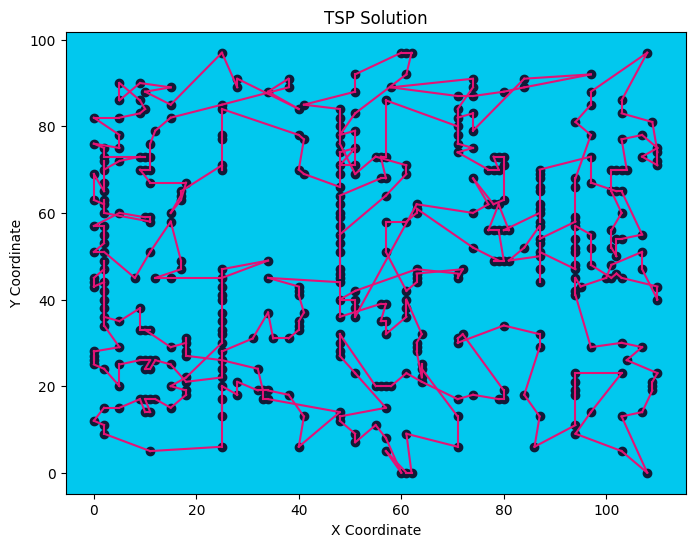

In [ ]:
import random
import math
import matplotlib.pyplot as plt

# Function to parse TSPLIB file
def parse_tsplib(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        node_coords_section = False
        node_coords = []
        for line in lines:
            if line.startswith('NODE_COORD_SECTION'):
                node_coords_section = True
                continue
            if line.startswith('EOF'):
                break
            if node_coords_section:
                node_data = line.strip().split()
                node_coords.append((float(node_data[1]), float(node_data[2])))
        return node_coords

# Function to calculate Euclidean distance between two nodes
def distance(node1, node2):
    return math.sqrt((node1[0] - node2[0]) ** 2 + (node1[1] - node2[1]) ** 2)

# Function to calculate total distance of a tour
def total_distance(tour, nodes):
    total = 0
    for i in range(len(tour) - 1):
        total += distance(nodes[tour[i]], nodes[tour[i + 1]])
    # Add distance from last node back to the starting node to complete the tour
    total += distance(nodes[tour[-1]], nodes[tour[0]])
    return total

# Simulated annealing function
def simulated_annealing(nodes, iterations, initial_temperature, cooling_rate):
    n = len(nodes)
    current_tour = list(range(n))
    random.shuffle(current_tour)  # Shuffle the initial tour
    best_tour = current_tour[:]
    current_temperature = initial_temperature

    for i in range(iterations):
        # Calculate the cost (total distance) of the current tour
        current_cost = total_distance(current_tour, nodes)

        # Generate a neighboring solution by reversing a random segment of the current tour
        new_tour = current_tour[:]
        start_index = random.randint(0, n - 1)
        end_index = random.randint(start_index + 1, n)
        new_tour[start_index:end_index] = reversed(new_tour[start_index:end_index])
        new_cost = total_distance(new_tour, nodes)

        # If the new solution is better or the acceptance probability is met, accept it
        if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / current_temperature):
            current_tour = new_tour[:]

        # Update the best solution found so far
        if total_distance(current_tour, nodes) < total_distance(best_tour, nodes):
            best_tour = current_tour[:]

        # Cool down the temperature
        current_temperature *= 1 - cooling_rate

    return best_tour

# Load data from TSPLIB file
filename = "pbn423.tsp"
nodes = parse_tsplib(filename)

# Parameters for simulated annealing
iterations = 100000
initial_temperature = 1000.0
cooling_rate = 0.0003

# Find the best tour using simulated annealing
best_tour = simulated_annealing(nodes, iterations, initial_temperature, cooling_rate)
print("Best tour:", best_tour)
print("Total distance (km):", total_distance(best_tour, nodes))

# Function to plot the data points and edges
def plot_tour(nodes, tour):
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))

    # Set the background color
    plt.gca().set_facecolor('#01C8EE')  # Background color

    plt.scatter(x, y, color='#101B37')  # Node color
    plt.title('TSP Solution')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')

    # Plot edges representing the tour
    for i in range(len(tour) - 1):
        plt.plot([nodes[tour[i]][0], nodes[tour[i + 1]][0]],
                 [nodes[tour[i]][1], nodes[tour[i + 1]][1]], color='#E41376')  # Edge color
    plt.plot([nodes[tour[-1]][0], nodes[tour[0]][0]],
             [nodes[tour[-1]][1], nodes[tour[0]][1]], color='#E41376')  # Connect last node to first node

    plt.show()

# Plot the tour
plot_tour(nodes, best_tour)


Best tour: [50, 51, 52, 53, 54, 43, 37, 39, 42, 36, 26, 27, 28, 29, 22, 23, 24, 13, 20, 12, 19, 21, 9, 0, 2, 3, 1, 4, 5, 6, 7, 8, 10, 11, 16, 15, 14, 17, 18, 25, 34, 30, 31, 32, 33, 35, 40, 41, 38, 44, 46, 58, 56, 57, 59, 65, 72, 71, 83, 70, 69, 64, 66, 61, 60, 62, 67, 73, 77, 85, 84, 89, 87, 90, 88, 91, 102, 103, 101, 100, 99, 98, 97, 96, 95, 108, 109, 104, 105, 106, 113, 118, 117, 116, 112, 115, 111, 110, 114, 120, 126, 127, 121, 122, 133, 125, 135, 134, 148, 138, 141, 143, 146, 147, 132, 158, 182, 181, 176, 173, 170, 168, 169, 152, 150, 144, 151, 159, 171, 178, 179, 175, 172, 174, 177, 183, 184, 187, 188, 190, 197, 189, 198, 203, 204, 208, 209, 210, 213, 214, 229, 222, 221, 223, 224, 227, 228, 236, 244, 233, 235, 238, 234, 239, 248, 249, 243, 245, 246, 240, 237, 241, 242, 265, 264, 280, 281, 298, 297, 303, 306, 309, 310, 313, 315, 336, 335, 344, 347, 353, 354, 358, 357, 356, 350, 349, 355, 359, 363, 362, 366, 360, 367, 364, 375, 371, 377, 372, 378, 373, 376, 374, 369, 365, 370, 368,

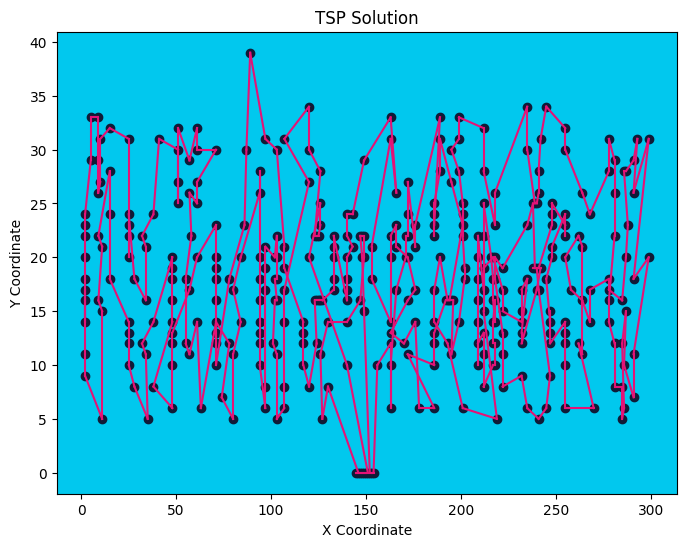

In [ ]:
import random
import math
import matplotlib.pyplot as plt

# Function to parse TSPLIB file
def parse_tsplib(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        node_coords_section = False
        node_coords = []
        for line in lines:
            if line.startswith('NODE_COORD_SECTION'):
                node_coords_section = True
                continue
            if line.startswith('EOF'):
                break
            if node_coords_section:
                node_data = line.strip().split()
                node_coords.append((float(node_data[1]), float(node_data[2])))
        return node_coords

# Function to calculate Euclidean distance between two nodes
def distance(node1, node2):
    return math.sqrt((node1[0] - node2[0]) ** 2 + (node1[1] - node2[1]) ** 2)

# Function to calculate total distance of a tour
def total_distance(tour, nodes):
    total = 0
    for i in range(len(tour) - 1):
        total += distance(nodes[tour[i]], nodes[tour[i + 1]])
    # Add distance from last node back to the starting node to complete the tour
    total += distance(nodes[tour[-1]], nodes[tour[0]])
    return total

# Simulated annealing function
def simulated_annealing(nodes, iterations, initial_temperature, cooling_rate):
    n = len(nodes)
    current_tour = list(range(n))
    random.shuffle(current_tour)  # Shuffle the initial tour
    best_tour = current_tour[:]
    current_temperature = initial_temperature

    for i in range(iterations):
        # Calculate the cost (total distance) of the current tour
        current_cost = total_distance(current_tour, nodes)

        # Generate a neighboring solution by reversing a random segment of the current tour
        new_tour = current_tour[:]
        start_index = random.randint(0, n - 1)
        end_index = random.randint(start_index + 1, n)
        new_tour[start_index:end_index] = reversed(new_tour[start_index:end_index])
        new_cost = total_distance(new_tour, nodes)

        # If the new solution is better or the acceptance probability is met, accept it
        if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / current_temperature):
            current_tour = new_tour[:]

        # Update the best solution found so far
        if total_distance(current_tour, nodes) < total_distance(best_tour, nodes):
            best_tour = current_tour[:]

        # Cool down the temperature
        current_temperature *= 1 - cooling_rate

    return best_tour

# Load data from TSPLIB file
filename = "pka379.tsp"
nodes = parse_tsplib(filename)

# Parameters for simulated annealing
iterations = 100000
initial_temperature = 1000.0
cooling_rate = 0.0003

# Find the best tour using simulated annealing
best_tour = simulated_annealing(nodes, iterations, initial_temperature, cooling_rate)
print("Best tour:", best_tour)
print("Total distance (km):", total_distance(best_tour, nodes))

# Function to plot the data points and edges
def plot_tour(nodes, tour):
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))

    # Set the background color
    plt.gca().set_facecolor('#01C8EE')  # Background color

    plt.scatter(x, y, color='#101B37')  # Node color
    plt.title('TSP Solution')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')

    # Plot edges representing the tour
    for i in range(len(tour) - 1):
        plt.plot([nodes[tour[i]][0], nodes[tour[i + 1]][0]],
                 [nodes[tour[i]][1], nodes[tour[i + 1]][1]], color='#E41376')  # Edge color
    plt.plot([nodes[tour[-1]][0], nodes[tour[0]][0]],
             [nodes[tour[-1]][1], nodes[tour[0]][1]], color='#E41376')  # Connect last node to first node

    plt.show()

# Plot the tour
plot_tour(nodes, best_tour)


Best tour: [566, 620, 613, 612, 617, 579, 544, 540, 506, 501, 478, 458, 421, 391, 386, 385, 423, 476, 477, 484, 486, 483, 499, 529, 531, 530, 504, 496, 497, 505, 452, 454, 455, 456, 480, 464, 465, 413, 373, 331, 355, 302, 303, 241, 231, 253, 251, 229, 210, 209, 256, 263, 289, 306, 198, 200, 195, 194, 196, 288, 285, 283, 281, 280, 282, 291, 255, 239, 257, 250, 248, 247, 249, 211, 201, 199, 197, 181, 122, 124, 118, 150, 163, 175, 173, 174, 172, 171, 176, 127, 137, 126, 212, 214, 158, 159, 165, 154, 151, 156, 222, 223, 311, 341, 351, 354, 418, 453, 451, 450, 449, 459, 430, 431, 432, 384, 420, 467, 393, 394, 402, 425, 395, 390, 389, 388, 310, 305, 304, 321, 312, 320, 343, 342, 344, 332, 290, 265, 356, 374, 411, 424, 401, 434, 457, 419, 372, 371, 370, 368, 347, 339, 317, 326, 337, 315, 300, 349, 350, 352, 369, 383, 448, 446, 447, 463, 469, 473, 474, 491, 492, 503, 502, 489, 481, 435, 427, 426, 422, 412, 403, 346, 396, 406, 397, 405, 415, 408, 407, 416, 460, 444, 443, 439, 440, 441, 428, 414

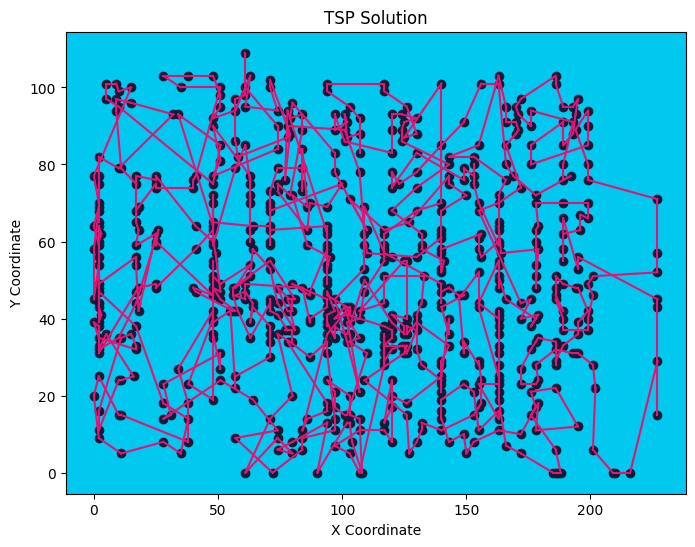

In [ ]:
import random
import math
import matplotlib.pyplot as plt

# Function to parse TSPLIB file
def parse_tsplib(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        node_coords_section = False
        node_coords = []
        for line in lines:
            if line.startswith('NODE_COORD_SECTION'):
                node_coords_section = True
                continue
            if line.startswith('EOF'):
                break
            if node_coords_section:
                node_data = line.strip().split()
                node_coords.append((float(node_data[1]), float(node_data[2])))
        return node_coords

# Function to calculate Euclidean distance between two nodes
def distance(node1, node2):
    return math.sqrt((node1[0] - node2[0]) ** 2 + (node1[1] - node2[1]) ** 2)

# Function to calculate total distance of a tour
def total_distance(tour, nodes):
    total = 0
    for i in range(len(tour) - 1):
        total += distance(nodes[tour[i]], nodes[tour[i + 1]])
    # Add distance from last node back to the starting node to complete the tour
    total += distance(nodes[tour[-1]], nodes[tour[0]])
    return total

# Simulated annealing function
def simulated_annealing(nodes, iterations, initial_temperature, cooling_rate):
    n = len(nodes)
    current_tour = list(range(n))
    random.shuffle(current_tour)  # Shuffle the initial tour
    best_tour = current_tour[:]
    current_temperature = initial_temperature

    for i in range(iterations):
        # Calculate the cost (total distance) of the current tour
        current_cost = total_distance(current_tour, nodes)

        # Generate a neighboring solution by reversing a random segment of the current tour
        new_tour = current_tour[:]
        start_index = random.randint(0, n - 1)
        end_index = random.randint(start_index + 1, n)
        new_tour[start_index:end_index] = reversed(new_tour[start_index:end_index])
        new_cost = total_distance(new_tour, nodes)

        # If the new solution is better or the acceptance probability is met, accept it
        if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / current_temperature):
            current_tour = new_tour[:]

        # Update the best solution found so far
        if total_distance(current_tour, nodes) < total_distance(best_tour, nodes):
            best_tour = current_tour[:]

        # Cool down the temperature
        current_temperature *= 1 - cooling_rate

    return best_tour

# Load data from TSPLIB file
filename = "xql662.tsp"
nodes = parse_tsplib(filename)

# Parameters for simulated annealing
iterations = 100000
initial_temperature = 1000.0
cooling_rate = 0.0003

# Find the best tour using simulated annealing
best_tour = simulated_annealing(nodes, iterations, initial_temperature, cooling_rate)
print("Best tour:", best_tour)
print("Total distance (km):", total_distance(best_tour, nodes))

# Function to plot the data points and edges
def plot_tour(nodes, tour):
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))

    # Set the background color
    plt.gca().set_facecolor('#01C8EE')  # Background color

    plt.scatter(x, y, color='#101B37')  # Node color
    plt.title('TSP Solution')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')

    # Plot edges representing the tour
    for i in range(len(tour) - 1):
        plt.plot([nodes[tour[i]][0], nodes[tour[i + 1]][0]],
                 [nodes[tour[i]][1], nodes[tour[i + 1]][1]], color='#E41376')  # Edge color
    plt.plot([nodes[tour[-1]][0], nodes[tour[0]][0]],
             [nodes[tour[-1]][1], nodes[tour[0]][1]], color='#E41376')  # Connect last node to first node

    plt.show()

# Plot the tour
plot_tour(nodes, best_tour)


Best tour: [42, 43, 51, 52, 53, 44, 20, 19, 34, 29, 26, 18, 25, 33, 32, 31, 30, 28, 23, 22, 17, 15, 14, 13, 7, 0, 8, 4, 5, 1, 9, 10, 11, 21, 16, 6, 2, 3, 12, 24, 27, 45, 65, 72, 77, 101, 85, 84, 76, 71, 70, 69, 63, 68, 62, 61, 67, 66, 60, 57, 55, 54, 64, 86, 87, 88, 115, 116, 144, 171, 164, 145, 146, 147, 148, 149, 150, 166, 174, 184, 192, 191, 183, 175, 176, 167, 168, 169, 157, 158, 159, 160, 161, 162, 163, 140, 131, 130, 123, 112, 113, 111, 126, 125, 124, 133, 132, 141, 142, 143, 179, 187, 186, 178, 177, 170, 185, 196, 195, 194, 193, 207, 215, 208, 218, 216, 219, 217, 209, 199, 200, 210, 198, 201, 212, 211, 223, 235, 236, 234, 222, 233, 232, 220, 231, 230, 229, 228, 227, 226, 225, 224, 221, 213, 202, 203, 204, 214, 206, 205, 189, 197, 188, 180, 172, 181, 190, 182, 173, 165, 151, 152, 137, 153, 154, 155, 156, 138, 139, 121, 122, 110, 108, 109, 107, 99, 98, 83, 75, 74, 82, 81, 80, 89, 93, 90, 94, 91, 97, 106, 120, 119, 118, 136, 135, 134, 129, 128, 127, 117, 114, 100, 92, 95, 103, 104,

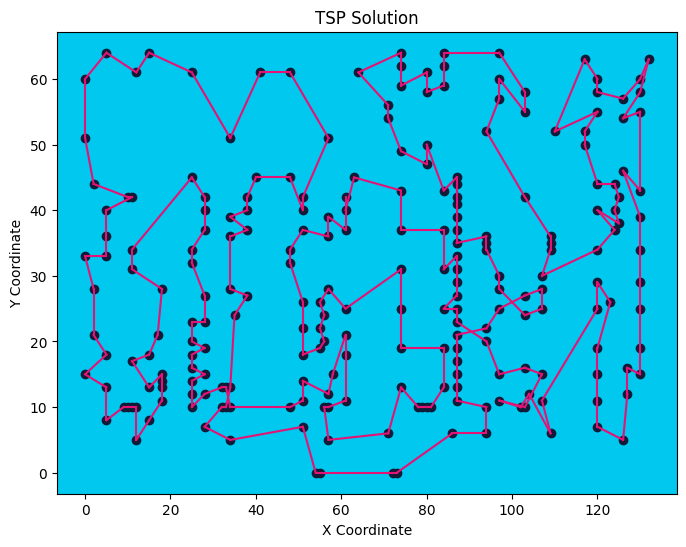

In [ ]:
import random
import math
import matplotlib.pyplot as plt

# Function to parse TSPLIB file
def parse_tsplib(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        node_coords_section = False
        node_coords = []
        for line in lines:
            if line.startswith('NODE_COORD_SECTION'):
                node_coords_section = True
                continue
            if line.startswith('EOF'):
                break
            if node_coords_section:
                node_data = line.strip().split()
                node_coords.append((float(node_data[1]), float(node_data[2])))
        return node_coords

# Function to calculate Euclidean distance between two nodes
def distance(node1, node2):
    return math.sqrt((node1[0] - node2[0]) ** 2 + (node1[1] - node2[1]) ** 2)

# Function to calculate total distance of a tour
def total_distance(tour, nodes):
    total = 0
    for i in range(len(tour) - 1):
        total += distance(nodes[tour[i]], nodes[tour[i + 1]])
    # Add distance from last node back to the starting node to complete the tour
    total += distance(nodes[tour[-1]], nodes[tour[0]])
    return total

# Simulated annealing function
def simulated_annealing(nodes, iterations, initial_temperature, cooling_rate):
    n = len(nodes)
    current_tour = list(range(n))
    random.shuffle(current_tour)  # Shuffle the initial tour
    best_tour = current_tour[:]
    current_temperature = initial_temperature

    for i in range(iterations):
        # Calculate the cost (total distance) of the current tour
        current_cost = total_distance(current_tour, nodes)

        # Generate a neighboring solution by reversing a random segment of the current tour
        new_tour = current_tour[:]
        start_index = random.randint(0, n - 1)
        end_index = random.randint(start_index + 1, n)
        new_tour[start_index:end_index] = reversed(new_tour[start_index:end_index])
        new_cost = total_distance(new_tour, nodes)

        # If the new solution is better or the acceptance probability is met, accept it
        if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / current_temperature):
            current_tour = new_tour[:]

        # Update the best solution found so far
        if total_distance(current_tour, nodes) < total_distance(best_tour, nodes):
            best_tour = current_tour[:]

        # Cool down the temperature
        current_temperature *= 1 - cooling_rate

    return best_tour

# Load data from TSPLIB file
filename = "xqg237.tsp"
nodes = parse_tsplib(filename)

# Parameters for simulated annealing
iterations = 100000
initial_temperature = 1000.0
cooling_rate = 0.0003

# Find the best tour using simulated annealing
best_tour = simulated_annealing(nodes, iterations, initial_temperature, cooling_rate)
print("Best tour:", best_tour)
print("Total distance (km):", total_distance(best_tour, nodes))

# Function to plot the data points and edges
def plot_tour(nodes, tour):
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))

    # Set the background color
    plt.gca().set_facecolor('#01C8EE')  # Background color

    plt.scatter(x, y, color='#101B37')  # Node color
    plt.title('TSP Solution')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')

    # Plot edges representing the tour
    for i in range(len(tour) - 1):
        plt.plot([nodes[tour[i]][0], nodes[tour[i + 1]][0]],
                 [nodes[tour[i]][1], nodes[tour[i + 1]][1]], color='#E41376')  # Edge color
    plt.plot([nodes[tour[-1]][0], nodes[tour[0]][0]],
             [nodes[tour[-1]][1], nodes[tour[0]][1]], color='#E41376')  # Connect last node to first node

    plt.show()

# Plot the tour
plot_tour(nodes, best_tour)
